In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [3]:
#切開來 -> 為之後步驟做準備
from sklearn.model_selection import train_test_split
#[90%題目, 10%答案, 90%題目, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(iris["data"], iris["target"], test_size=0.1)

In [4]:
clu = KMeans(n_clusters = 3)
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print("預測:",clu.predict(x_test))

預測: [2 1 1 2 2 2 0 2 0 0 0 0 2 1 2]


In [6]:
print("本來標籤:",list(y_test))

本來標籤: [1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1]


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(clu.predict(x_test),y_test)

0.13333333333333333

In [8]:
#拿出資料點被打上的標籤
clu.labels_

array([2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 0])

In [10]:
from sklearn.metrics import silhouette_score
xs = []
ys = []
for k in range(2,6):    
    clu = KMeans(n_clusters = k)
    clu.fit(iris["data"])
    xs.append(k)
    score = silhouette_score(iris["data"], clu.labels_)
    ys.append(score)
print(xs)
print(ys)

[2, 3, 4, 5]
[0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048]


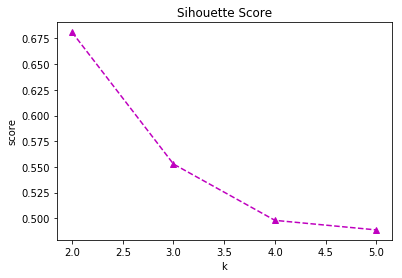

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Sihouette Score")
plt.xlabel("k")
plt.ylabel("score")
plt.plot(xs ,ys,"m^--")
#plt.show()